In [8]:
import sqlite3
import pandas as pd
import matplotlib as rc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [45]:
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


In [46]:
# set style for seaborn
sns.set_style("whitegrid")
sns.set_context("paper")
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')


In [47]:
# connect to database
connection = sqlite3.connect("../output/db/repeated_bulk_analysis_2019-08-28.db")


In [61]:
# load games and moves into dataframes 
df_score = pd.read_sql("SELECT MAX(score_b0010) - MIN(score_b0010) as '10ms', MAX(score_b0020) - MIN(score_b0020) as '20ms', MAX(score_b0050) - MIN(score_b0050) as '50ms', MAX(score_b0100) - MIN(score_b0100) as '100ms', MAX(score_b0200) - MIN(score_b0200) as '200ms', MAX(score_b0500) - MIN(score_b0500) as '500ms', MAX(score_b1000) - MIN(score_b1000) as '1000ms', MAX(score_b2000) - MIN(score_b2000) as '2000ms', MAX(score_b10) - MIN(score_b10) as '15 d', MAX(score_b20) - MIN(score_b20) as '20 d' FROM score JOIN move ON score.move_id = move.id GROUP BY move.game_id, move.ply_number", connection)
df_score.describe()

,10ms,20ms,50ms,100ms,200ms,500ms,1000ms,2000ms,15 d,20 d
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,34.003215,32.588424,31.572347,32.372990,30.906752,27.147910,25.099678,23.546624,28.919614,24.601286
std,23.366574,20.509739,22.465610,23.516688,19.588533,19.435186,17.010614,17.201564,19.152107,16.003080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,20.000000,19.000000,19.000000,19.500000,16.000000,14.000000,14.000000,18.000000,15.000000
50%,30.000000,30.000000,30.000000,29.000000,29.000000,24.000000,23.000000,22.000000,26.000000,23.000000
75%,45.500000,42.000000,41.000000,42.000000,41.000000,34.000000,33.000000,30.000000,38.000000,33.000000
max,203.000000,127.000000,193.000000,198.000000,143.000000,163.000000,111.000000,140.000000,143.000000,83.000000


Text(0, 0.5, 'centipawn')

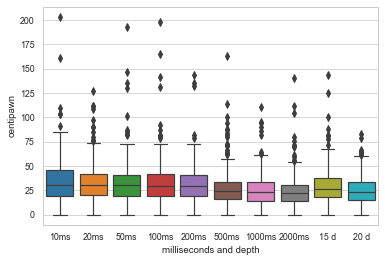

In [60]:
boxplot_score = sns.boxplot(x="variable", y="value", data=pd.melt(df_score))
boxplot_score.set_xlabel("milliseconds and depth")
boxplot_score.set_ylabel("centipawn")
boxplot_score.set_title("")
#sns.set_xlabel(["10ms", "20ms", "50ms", "100ms", "200ms", "500ms", "1000ms", "2000ms", "5000ms", "15 depth", "20 depth"])

In [58]:
df_timing_score = pd.read_sql("SELECT score_b0010 as '10ms', score_b0020 as '20ms', score_b0050 as '50ms', score_b0100 as '100ms', score_b0200 as '200ms', score_b0500 as '500ms', score_b1000 as '1000ms', score_b2000 as '2000ms', score_b10 as '15 d', score_b20 as '20d' FROM timing_score", connection)


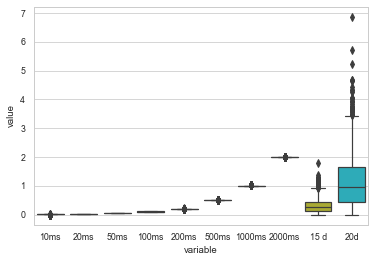

In [59]:
sns.boxplot(x="variable", y="value", data=pd.melt(df_timing_score))